In [ ]:

from google.colab import drive
drive.mount('/content/drive')


import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/120dog breeds-299.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/projectDataset299')


with zipfile.ZipFile('/content/drive/MyDrive/120dog breeds-224.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/projectDataset224')



Mounted at /content/drive


In [ ]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import applications
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D, BatchNormalization

In [ ]:
import pathlib
from keras.preprocessing.image import ImageDataGenerator


data_dir1 = pathlib.Path('/content/projectDataset299/120dog breeds-299')

data_train1 = data_dir1 / 'train'

test_dir1 = data_dir1 / 'test'


data_dir = pathlib.Path('/content/projectDataset224/120dog breeds-224')

data_train = data_dir / 'train'

test_dir = data_dir / 'test'

labels_csv = pd.read_csv('/content/drive/MyDrive/labels.csv')
labels_csv['id'] = [str(fname) + '.jpg' for fname in labels_csv['id']]

In [ ]:
batch_size = 16
img_size = 224
img_size1 = 299

In [ ]:
# datagen1 = ImageDataGenerator(preprocessing_function = keras.applications.vgg16.preprocess_input, validation_split=0.2)
# datagen2 = ImageDataGenerator(preprocessing_function = keras.applications.resnet50.preprocess_input, validation_split=0.2)
# datagen3 = ImageDataGenerator(preprocessing_function = keras.applications.inception_v3.preprocess_input, validation_split=0.2)
from keras.utils import to_categorical
datagen1 = ImageDataGenerator(
    preprocessing_function=keras.applications.vgg16.preprocess_input,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.05,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    validation_split=0.2
)

datagen2 = ImageDataGenerator(
    preprocessing_function=keras.applications.resnet50.preprocess_input,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.05,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    validation_split=0.2
)

datagen3 = ImageDataGenerator(
    preprocessing_function=keras.applications.inception_v3.preprocess_input,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.05,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    validation_split=0.2
)

validation_datagen1 = ImageDataGenerator(
    preprocessing_function=keras.applications.vgg16.preprocess_input,
    validation_split=0.2
)

validation_datagen2 = ImageDataGenerator(
    preprocessing_function=keras.applications.resnet50.preprocess_input,
    validation_split=0.2
)

validation_datagen3 = ImageDataGenerator(
    preprocessing_function=keras.applications.inception_v3.preprocess_input,
    validation_split=0.2
)
def generate_generator_multiple():
    genX1 = datagen1.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        # class_mode="sparse",
                        class_mode='categorical',
                        color_mode="rgb",
                        target_size=(img_size, img_size))

    genX2 = datagen2.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        # class_mode="sparse",
                        class_mode='categorical',
                        color_mode="rgb",
                        target_size=(img_size, img_size))

    genX3 = datagen3.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train1,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        # class_mode="sparse",
                        class_mode='categorical',
                        color_mode="rgb",
                        target_size=(img_size1, img_size1))
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            X3i = genX3.next()
            yield [X1i[0], X2i[0],X3i[0]], X3i[1]  #Yield both images and their mutual label

def generate_generator_multiple2():
    genX1 = validation_datagen1.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train1,
                        # subset="training",
                        subset='validation',
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        # class_mode="sparse",
                        class_mode='categorical',
                        color_mode="rgb",
                        target_size=(img_size, img_size))

    genX2 = validation_datagen2.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train1,
                        # subset="training",
                        subset='validation',
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        # class_mode="sparse",
                        class_mode='categorical',
                        color_mode="rgb",
                        target_size=(img_size, img_size))

    genX3 = validation_datagen3.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train1,
                        # subset="training",
                        subset='validation',
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        # class_mode="sparse",
                        class_mode='categorical',
                        color_mode="rgb",
                        target_size=(img_size1, img_size1))
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            X3i = genX3.next()
            yield [X1i[0], X2i[0],X3i[0]], X3i[1]  #Yield both images and their mutual label

inputgenerator=generate_generator_multiple()
validation_generator=generate_generator_multiple2()


# train_labels = to_categorical(inputgenerator.labels)
# validation_labels = to_categorical(validation_generator.labels)


In [ ]:
import tensorflow as tf
from tensorflow.python.keras.metrics import AUC
from sklearn.metrics import roc_curve, auc

# Define the ROC metrics
tpr = tf.keras.metrics.TruePositives(name='tp')
fpr = tf.keras.metrics.FalsePositives(name='fp')
auc_metric = AUC(name='auc')

In [ ]:
class JoinedGen(tf.keras.utils.Sequence):
    def __init__(self, input_gen1, input_gen2, input_gen3, target_gen):
        self.gen1 = input_gen1
        self.gen2 = input_gen2
        self.gen3 = input_gen3
        self.gen4 = target_gen

        assert len(input_gen1) == len(input_gen2) == len(input_gen3) == len(target_gen)

    def __len__(self):
        return len(self.gen1)

    def __getitem__(self, i):
        x1 = self.gen1[i]
        x2 = self.gen2[i]
        x3 = self.gen3[i]
        y = self.gen4[i]

        return [x1, x2, x3],y

    def on_epoch_end(self):
        self.gen1.on_epoch_end()
        self.gen2.on_epoch_end()
        self.gen3.on_epoch_end()
        self.gen4.on_epoch_end()
        self.gen2.index_array = self.gen1.index_array
        self.gen3.index_array = self.gen1.index_array
        self.gen4.index_array = self.gen1.index_array

In [ ]:
vgg16 = applications.vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
resnet50 = keras.applications.ResNet50(include_top=False, weights='imagenet',input_shape=(224,224,3))
inceptionV3 = applications.inception_v3.InceptionV3(include_top=False, weights='imagenet',input_shape=(299,299,3))

for layer in vgg16 .layers:
    layer.trainable=False
for layer in resnet50.layers:
    layer.trainable=False
for layer in inceptionV3.layers:
    layer.trainable=False

model1 = Sequential()
model2 = Sequential()
model3 = Sequential() 

model1.add(vgg16)
model1.add(BatchNormalization())
model1.add(GlobalAveragePooling2D())
model1.add(Dropout(0.5))
model1.add(Dense(1024, activation='leaky_relu'))
model1.add(Dropout(0.5))
model1.add(Dense(256, activation='leaky_relu'))
model1.add(Dropout(0.5))
model1.add(Dense(120, activation='softmax'))

model2.add(resnet50)
model2.add(BatchNormalization())
model2.add(GlobalAveragePooling2D())
model2.add(Dropout(0.5))
model2.add(Dense(1024, activation='leaky_relu'))
model2.add(Dropout(0.5))
model2.add(Dense(120, activation='softmax'))

model3.add(inceptionV3)
model3.add(BatchNormalization())
model3.add(GlobalAveragePooling2D())
model3.add(Dropout(0.5))
model3.add(Dense(1024, activation='leaky_relu'))
model3.add(Dropout(0.5))
model3.add(Dense(120, activation='softmax'))

optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001)
model1.compile(optimizer=optimizer,
              #  loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              #  metrics=['accuracy'])
              metrics=[tpr, fpr, auc_metric, 'accuracy', 'Precision', 'Recall'])
model2.compile(optimizer=optimizer,
              #  loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              #  metrics=['accuracy'])
              metrics=[tpr, fpr, auc_metric, 'accuracy', 'Precision', 'Recall'])
model3.compile(optimizer=optimizer,
              #  loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              #  metrics=['accuracy'])
              metrics=[tpr, fpr, auc_metric, 'accuracy', 'Precision', 'Recall'])

In [ ]:
models = []
models.append(model1)
models.append(model2)
models.append(model3)
ensemble_visible = [model.input for model in models]
ensemble_outputs = [model.output for model in models]
merge = tf.keras.layers.concatenate(ensemble_outputs)
merge = tf.keras.layers.BatchNormalization()(merge)
merge = tf.keras.layers.Dense(1024, activation='relu')(merge)
merge = tf.keras.layers.Dropout(0.5)(merge)
output = tf.keras.layers.Dense(120, activation='softmax')(merge)
ensemble_model = tf.keras.models.Model(inputs=ensemble_visible, outputs=output)
ensemble_model.compile(optimizer=optimizer,
                      #  loss='sparse_categorical_crossentropy',
                      loss='categorical_crossentropy',
                      #  metrics=['accuracy'])
                      metrics=[tpr, fpr, auc_metric, 'accuracy', 'Precision', 'Recall'])
ensemble_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 vgg16_input (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['vgg16_input[0][0]']            
                                                                                                  
 batch_normalization_486 (Batch  (None, 7, 7, 512)   2048        ['vgg16[0][0]']                  
 Normalization)                                                                                   
                                                                                            

In [ ]:
# history_ens = ensemble_model.fit(inputgenerator, epochs=20, verbose = 1,
#                                  steps_per_epoch = 8178/batch_size,
#                                  validation_steps = 2044/batch_size,
#                                  validation_data=validation_generator)

from keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint_cb = ModelCheckpoint("/content/drive/MyDrive/Ensemble_StackingVersion2DA+ROC.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)


history_ens = ensemble_model.fit(inputgenerator, epochs=50, verbose = 1,
                        steps_per_epoch = 8178/batch_size,
                        validation_steps = 2044/batch_size,
                        validation_data=validation_generator,
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
511/511 [==============================] - 457s 896ms/step - loss: 1.0990 - tp: 3769.0000 - fp: 660.0000 - auc: 0.9356 - accuracy: 0.7082 - precision: 0.8510 - recall: 0.4609 - val_loss: 0.6455 - val_tp: 1554.0000 - val_fp: 260.0000 - val_auc: 0.9470 - val_accuracy: 0.8019 - val_precision: 0.8567 - val_recall: 0.7603
Epoch 2/50
511/511 [==============================] - 455s 891ms/step - loss: 0.8938 - tp: 4933.0000 - fp: 836.0000 - auc: 0.9549 - accuracy: 0.7474 - precision: 0.8551 - recall: 0.6032 - val_loss: 0.5850 - val_tp: 1637.0000 - val_fp: 253.0000 - val_auc: 0.9609 - val_accuracy: 0.8386 - val_precision: 0.8661 - val_recall: 0.8009
Epoch 3/50
511/511 [==============================] - 465s 911ms/step - loss: 0.7846 - tp: 5504.0000 - fp: 915.0000 - auc: 0.9654 - accuracy: 0.7706 - precision: 0.8575 - recall: 0.6730 - val_loss: 0.6049 - val_tp: 1657.0000 - val_fp: 265.0000 - val_auc: 0.9689 - val_accuracy: 0.8346 - val_precision: 0.8621 - val_recall: 0.8107
Epoch 4/50

In [ ]:
ensemble_model.save('/content/drive/MyDrive/Ensemble_StackingDA+ROC_Version2.h5')

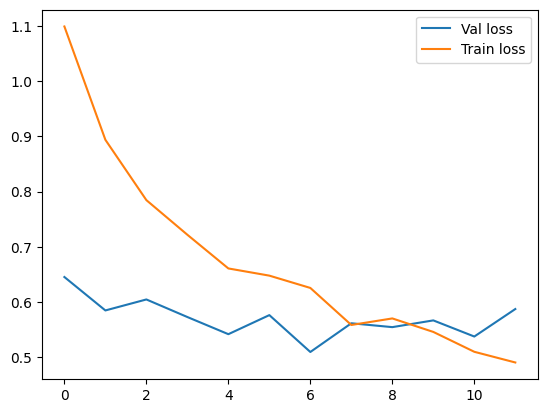

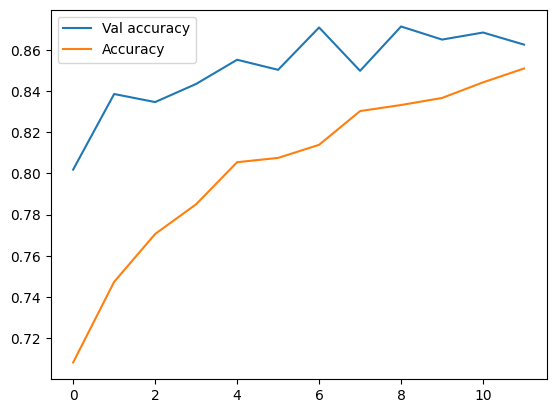

In [ ]:
plt.figure()
plt.plot(history_ens .history["val_loss"], label = "Val loss")
plt.plot(history_ens .history["loss"], label = "Train loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(history_ens .history["val_accuracy"], label = "Val accuracy")
plt.plot(history_ens .history["accuracy"], label = "Accuracy")
plt.legend()
plt.show()

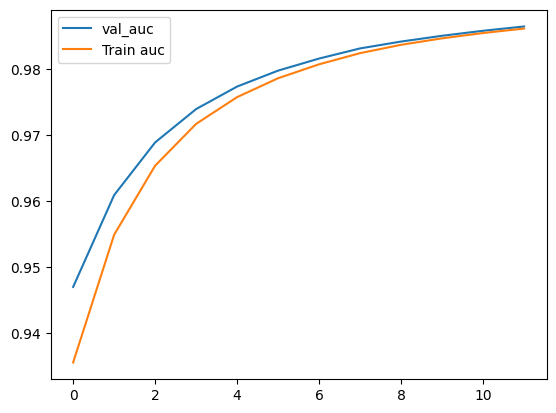

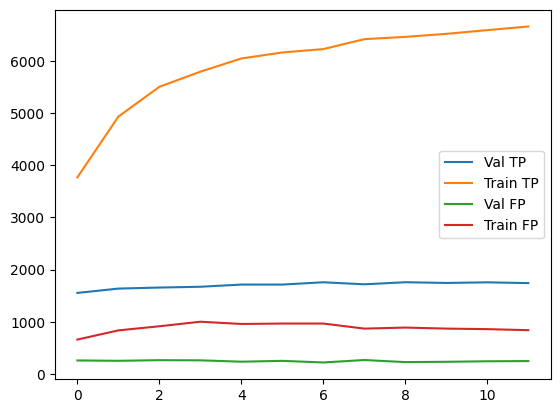

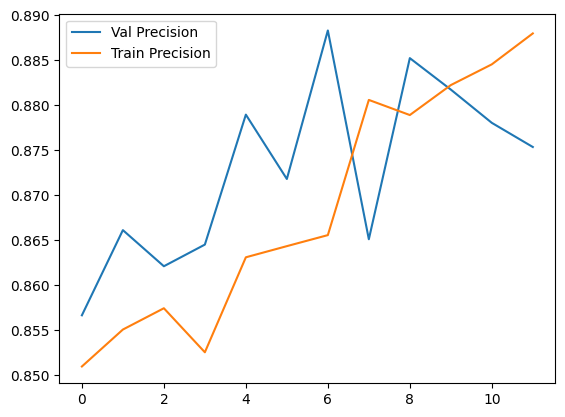

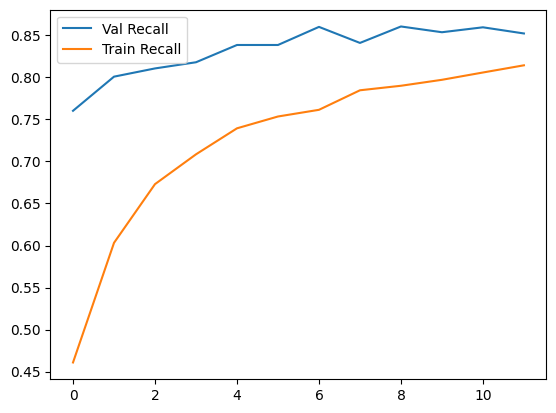

In [ ]:
plt.figure()
plt.plot(history_ens .history['val_auc'], label = 'val_auc')
plt.plot(history_ens .history['auc'], label = 'Train auc')
plt.legend()
plt.show()

plt.figure()
plt.plot(history_ens .history['val_tp'], label = 'Val TP')
plt.plot(history_ens .history['tp'], label = 'Train TP')
plt.plot(history_ens .history['val_fp'], label = 'Val FP')
plt.plot(history_ens .history['fp'], label = 'Train FP')
plt.legend()
plt.show()

plt.figure()
plt.plot(history_ens .history['val_precision'], label = 'Val Precision')
plt.plot(history_ens .history['precision'], label = 'Train Precision')
plt.legend()
plt.show()

plt.figure()
plt.plot(history_ens .history['val_recall'], label = 'Val Recall')
plt.plot(history_ens .history['recall'], label = 'Train Recall')
plt.legend()
plt.show()